# 10. 預測性分析與機器學習

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
from pandas import Series, DataFrame

## 10.1 scikit-learn 概貌

In [3]:
import pkgutil as pu
import pydoc
import sklearn

print("sklearn version", sklearn.__version__)

def clean(astr):
    s = astr
    # remove multiple spaces
    s = ' '.join(s.split())
    s = s.replace('=','')
    return s

def print_desc(prefix, pkg_path):
    for pkg in pu.iter_modules(path=pkg_path):
        name = prefix + "." + pkg[1]

        if pkg[2] == True:
            try:
                docstr = pydoc.plain(pydoc.render_doc(name))
                docstr = clean(docstr)
                start = docstr.find("DESCRIPTION")
                docstr = docstr[start: start + 140]
                print(name, docstr)
            except:
                continue

print_desc("sklearn", sklearn.__path__)

sklearn version 0.18.1
sklearn.__check_build DESCRIPTION Module to give helpful messages to the user that did not compile the scikit properly. PACKAGE CONTENTS _check_build setup FUNCTI
sklearn._build_utils 
sklearn.cluster DESCRIPTION The :mod:`sklearn.cluster` module gathers popular unsupervised clustering algorithms. PACKAGE CONTENTS _dbscan_inner _feature_ag
sklearn.covariance DESCRIPTION The :mod:`sklearn.covariance` module includes methods and algorithms to robustly estimate the covariance of features given a set
sklearn.cross_decomposition 
sklearn.datasets DESCRIPTION The :mod:`sklearn.datasets` module includes utilities to load datasets, including methods to load and fetch popular reference da
sklearn.decomposition DESCRIPTION The :mod:`sklearn.decomposition` module includes matrix decomposition algorithms, including among others PCA, NMF or ICA. Most o
sklearn.ensemble DESCRIPTION The :mod:`sklearn.ensemble` module includes ensemble-based methods for classification, regressio

## 10.2 預處理

In [169]:
# 原始資料來源: https://www.knmi.nl/nederland-nu/klimatologie/daggegevens 之下的 "260"
# f = 'etmgeg_260.txt'
# df = pd.read_csv(f, skiprows = 47, header=0, low_memory=False)
# df.columns = [c.strip() for c in df.columns]
# df.tail()

In [170]:
# rain = df[['DR', 'RH', 'RHX']] 

# def to_float(v):
#     v = v.strip()
#     try: 
#         return  float(v) 
#     except:
#         return np.nan

# rain = rain.applymap(to_float)
# rain = pd.concat([df['YYYYMMDD'], rain], axis = 1)
# rain.dropna(inplace = True)
# rain.index = Series(range(len(rain)))
# rain.to_csv('rain.csv')
# rain.tail() 

In [4]:
df = pd.read_csv('rain.csv')
rain = df['RH']
dates = df['YYYYMMDD']
rain.tail()

31863     2.0
31864    19.0
31865    -1.0
31866     0.0
31867     9.0
Name: RH, dtype: float64

In [5]:
import numpy as np
from sklearn import preprocessing
from scipy.stats import anderson


# rain = np.load('rain.npy')
rain = .1 * rain
rain[rain < 0] = .05/2
print("Rain mean", rain.mean())
print("Rain variance", rain.var())
print("Anderson rain", anderson(rain))

scaled = preprocessing.scale(rain)
print("Scaled mean", scaled.mean())
print("Scaled variance", scaled.var())
print("Anderson scaled", anderson(scaled))

print(len(rain[rain < 0]))
binarized = preprocessing.binarize(rain)
print(np.unique(binarized), binarized.sum())

lb = preprocessing.LabelBinarizer()
lb.fit(rain.astype(int))
print(lb.classes_)

Rain mean 2.2117225743693067
Rain variance 19.687869586540586
Anderson rain AndersonResult(statistic=4706.3535591176333, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Scaled mean -2.67557199357e-17
Scaled variance 1.0
Anderson scaled AndersonResult(statistic=4706.3535591175969, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
0
[ 0.  1.] 20539.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 52 53 55 58 61 63]


D:\Python\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## 10.3 基於邏輯回歸的分類

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn import datasets
import numpy as np

def classify(x, y):
    clf = LogisticRegression(random_state=12)
    scores = []
    kf = KFold(len(y), n_folds=10)

    for train,test in kf:
        clf.fit(x[train], y[train])
        scores.append(clf.score(x[test], y[test]))

    print(np.mean(scores))

# rain = np.load('rain.npy')
# dates = np.load('doy.npy')

x = np.vstack((dates[:-1], rain[:-1]))
y = np.sign(rain[1:])
classify(x.T, y)

#iris example
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
classify(x, y)

ValueError: Can't handle mix of continuous and binary

## 10.4 SVM (Support Vector Machines)

In [8]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn import datasets
import numpy as np
from pprint import PrettyPrinter

def classify(x, y):
    clf = GridSearchCV(SVC(random_state=42, max_iter=100), {'kernel': ['linear', 'poly', 'rbf'], 'C':[1, 10]})

    clf.fit(x, y)
    print("Score", clf.score(x, y))
    PrettyPrinter().pprint(clf.grid_scores_)

# rain = np.load('rain.npy')
# dates = np.load('doy.npy')

x = np.vstack((dates[:-1], rain[:-1]))
y = np.sign(rain[1:])
classify(x.T, y)

#iris example
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
classify(x, y)

D:\Python\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\Python\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\Python\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\Python\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\Python\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_it

Score 0.648821665045
[mean: 0.51680, std: 0.10622, params: {'kernel': 'linear', 'C': 1},
 mean: 0.64449, std: 0.00003, params: {'kernel': 'poly', 'C': 1},
 mean: 0.64452, std: 0.00006, params: {'kernel': 'rbf', 'C': 1},
 mean: 0.51602, std: 0.10720, params: {'kernel': 'linear', 'C': 10},
 mean: 0.64449, std: 0.00003, params: {'kernel': 'poly', 'C': 10},
 mean: 0.35554, std: 0.00004, params: {'kernel': 'rbf', 'C': 10}]
Score 0.82
[mean: 0.80000, std: 0.03949, params: {'kernel': 'linear', 'C': 1},
 mean: 0.58667, std: 0.12603, params: {'kernel': 'poly', 'C': 1},
 mean: 0.80000, std: 0.03254, params: {'kernel': 'rbf', 'C': 1},
 mean: 0.74667, std: 0.07391, params: {'kernel': 'linear', 'C': 10},
 mean: 0.56667, std: 0.13132, params: {'kernel': 'poly', 'C': 10},
 mean: 0.79333, std: 0.03467, params: {'kernel': 'rbf', 'C': 10}]


D:\Python\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\Python\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\Python\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\Python\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
D:\Python\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_it

## 10.5 基於 ElasticNetCV 的回歸分析

Score 0.000330872759207


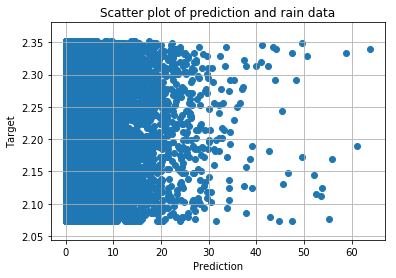

Score 0.683143903455


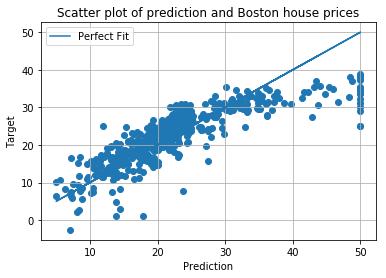

In [10]:
from sklearn.linear_model import ElasticNetCV
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


def regress(x, y, title):
    clf = ElasticNetCV(max_iter=200, cv=10, l1_ratio = [.1, .5, .7, .9, .95, .99, 1])

    clf.fit(x, y)
    print("Score", clf.score(x, y))

    pred = clf.predict(x)
    plt.title("Scatter plot of prediction and " + title)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.scatter(y, pred)

    # Show perfect fit line
    if "Boston" in title:
        plt.plot(y, y, label="Perfect Fit")
        plt.legend()

    plt.grid(True)
    plt.show()

# rain = .1 * np.load('rain.npy')
rain[rain < 0] = .05/2
# dates = np.load('doy.npy')

x = np.vstack((dates[:-1], rain[:-1]))
y = rain[1:]
regress(x.T, y, "rain data")

boston = datasets.load_boston()
x = boston.data
y = boston.target
regress(x, y, "Boston house prices")

## 10.6 支持向量回歸

D:\Python\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Max test score Rain -0.00554889727415


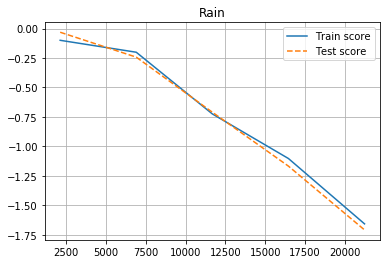

Max test score Boston 0.662092301104


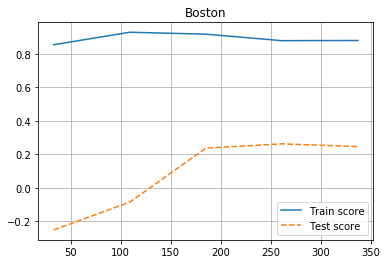

In [11]:
import numpy as np
from sklearn import datasets
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVR
from sklearn import preprocessing
import multiprocessing
import matplotlib.pyplot as plt


def regress(x, y, ncpus, title):
    X = preprocessing.scale(x)
    Y = preprocessing.scale(y)
    clf = SVR(max_iter=ncpus * 200)

    train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, n_jobs=ncpus) 

    plt.figure()
    plt.title(title)
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score")
    plt.plot(train_sizes, test_scores.mean(axis=1), '--', label="Test score")
    print("Max test score " + title, test_scores.max())
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

# rain = .1 * np.load('rain.npy')
rain[rain < 0] = .05/2
# dates = np.load('doy.npy')

x = np.vstack((dates[:-1], rain[:-1]))
y = rain[1:]
ncpus = multiprocessing.cpu_count()
regress(x.T, y, ncpus, "Rain")

boston = datasets.load_boston()
x = boston.data
y = boston.target
regress(x, y, ncpus, "Boston")

## 10.7 基於相似性傳播算法的聚類分析

0
1
2


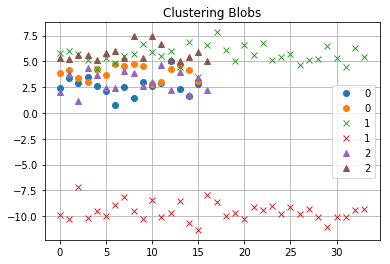

In [12]:
from sklearn import datasets
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances


x, _ = datasets.make_blobs(n_samples=100, centers=3, n_features=2, random_state=10)
S = euclidean_distances(x)

aff_pro = cluster.AffinityPropagation().fit(S)
labels = aff_pro.labels_

styles = ['o', 'x', '^']

for style, label in zip(styles, np.unique(labels)):
    print(label)
    plt.plot(x[labels == label], style, label=label)

plt.title("Clustering Blobs")
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 10.8 均值飄移算法

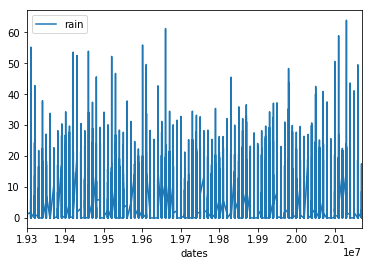

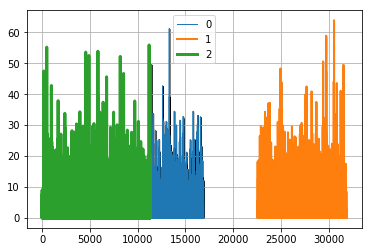

In [13]:
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
import pandas as pd


# rain = .1 * np.load('rain.npy')
rain[rain < 0] = .05/2
# dates = np.load('doy.npy')
x = np.vstack((dates, rain))
df = pd.DataFrame.from_records(x.T, columns=['dates', 'rain'])
df = df.groupby('dates').mean()

df.plot()
x = np.vstack((np.arange(1, len(df) + 1) , df.as_matrix().ravel()))
x = x.T
ms = cluster.MeanShift()
ms.fit(x)
labels = ms.predict(x)

plt.figure()
grays = ['0', '0.5', '0.75']

for gray, label in zip(grays, np.unique(labels)):
    match = labels == label
    x0 = x[:, 0]
    x1 = x[:, 1]
    plt.plot(x0[match], x1[match], lw=label+1, label=label)
    plt.fill_between(x0, x1, where=match, color=gray)

plt.grid(True)
plt.legend()
plt.show()

## 10.9 遺傳算法

In [15]:
# import array
# import random
# import numpy as np
# from deap import algorithms
# from deap import base
# from deap import creator
# from deap import tools
# from scipy.stats import shapiro
# import matplotlib.pyplot as plt


# creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMax)

# toolbox = base.Toolbox()
# toolbox.register("attr_float", random.random)
# toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 200)
# toolbox.register("populate", tools.initRepeat, list, toolbox.individual)

# def eval(individual):
#     return shapiro(individual)[1],

# toolbox.register("evaluate", eval)
# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
# toolbox.register("select", tools.selTournament, tournsize=4)

# random.seed(42)

# pop = toolbox.populate(n=400)
# hof = tools.HallOfFame(1)
# stats = tools.Statistics(key=lambda ind: ind.fitness.values)
# stats.register("max", np.max)

# algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=80, stats=stats, halloffame=hof)

# print(shapiro(hof[0])[1])
# plt.hist(hof[0])
# plt.grid(True)
# plt.show()

## 10.10 神經網路

In [18]:
# import numpy as np
# import theanets
# import multiprocessing
# from sklearn import datasets
# from sklearn.metrics import accuracy_score


# rain = .1 * np.load('rain.npy')
# rain[rain < 0] = .05/2
# dates = np.load('doy.npy')
# x = np.vstack((dates[:-1], np.sign(rain[:-1])))
# x = x.T

# y = np.vstack(np.sign(rain[1:]),)
# N = int(.9 * len(x))

# e = theanets.Experiment(theanets.Regressor,
#                         layers=(2, 3, 1),
#                         learning_rate=0.1,
#                         momentum=0.5,
#                         patience=300,
#                         train_batches=multiprocessing.cpu_count(),
#                         num_updates=500)

# train = [x[:N], y[:N]]
# valid = [x[N:], y[N:]]
# e.run(train, valid)

# pred = e.network(x[N:]).ravel()
# print("Pred Min", pred.min(), "Max", pred.max())
# print("Y Min", y.min(), "Max", y.max())
# print("Accuracy", accuracy_score(y[N:], pred >= .5))

## 10.11 決策樹

In [21]:
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import pydot
import io
import numpy as np
from tempfile import NamedTemporaryFile

# rain = .1 * np.load('rain.npy')
rain[rain < 0] = .05/2
# dates = np.load('doy.npy').astype(int)
x = np.vstack((dates[:-1], np.sign(rain[:-1])))
x = x.T

y = np.sign(rain[1:])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=37)

clf = tree.DecisionTreeClassifier(random_state=37)
params = {"max_depth": [2, None],
              "min_samples_leaf": sp_randint(1, 5),
              "criterion": ["gini", "entropy"]}
rscv = RandomizedSearchCV(clf, params)
rscv.fit(x_train,y_train)

sio = io.StringIO()
tree.export_graphviz(rscv.best_estimator_, out_file=sio, feature_names=['day-of-year','yest'])
dec_tree = pydot.graph_from_dot_data(sio.getvalue())

with NamedTemporaryFile(prefix='rain', suffix='.png', delete=False) as f:
    dec_tree.write_png(f.name)
    print("Written figure to", f.name)

print("Best Train Score", rscv.best_score_)
print("Test Score", rscv.score(x_test, y_test))
print("Best params", rscv.best_params_)

ImportError: No module named 'pydot'